## Imports ##

In [1]:
import numpy as np
import pandas as pd
import math
import sys
from numpy import random
from numpy import linalg
import matplotlib.pyplot as plt

## Input ##

In [2]:
n_row = 4000
n_col = 1000
possibilities = [-1.0, 1.0]

In [3]:
W = np.random.normal(size = (n_row, n_col)) 
X = np.random.choice(possibilities, n_col)
Y = np.maximum((np.dot(W, X)/math.sqrt(n_col)), 0)
T = 0.1
B = 1/T
n_iter = 10000
N = 100

## Helper functions ##

In [4]:
def energy(vector):
    dot = np.dot(W, vector)
    diff = Y - np.maximum(0, dot) / math.sqrt(n_col)
    return diff.T.dot(diff)

In [5]:
def error(vector):
    diff = vector - X
    return diff.T.dot(diff)/(4*n_col)

In [6]:
def get_loss_category(loss):
    if loss >= 0.5:
        return '>0.5'
    elif loss < 0.5 and loss >= 0.4:
        return '0.5-0.4'
    elif loss < 0.4 and loss >= 0.3:
        return '0.4-0.3'
    elif loss < 0.3 and loss >= 0.2:
        return '0.3-0.2'
    elif loss < 0.2 and loss >= 0.1:
        return '0.2-0.1'
    elif loss < 0.1 and loss >= 0.05:
        return '0.1-0.05'
    elif loss < 0.05 and loss >= 0.01:
        return '0.05-0.01'
    elif loss < 0.01:
        return '<0.01'
    else:
        print("Y a comme une couille: loss = {}".format(loss))

In [7]:
def Metropolis_chain(dim, n_iter, B, threshold, rate):
    print("Metropolis with initial B: {} , threshold : {} , rate: {}".format(B, threshold, rate))
    loss_dict = {'>0.5':0, '0.5-0.4':0, '0.4-0.3':0, '0.3-0.2':0, '0.2-0.1':0, '0.1-0.05':0, '0.05-0.01':0, '<0.01':0}
    test = np.random.choice(possibilities, dim)
    errors = np.zeros(n_iter)
    iter_increase = n_iter * threshold
    for _iter in range(n_iter):
        if _iter > iter_increase:
            B = B*rate
        to_flip = np.random.randint(0, dim)
        to_test = test.copy()
        to_test[to_flip] = -to_test[to_flip]
        proba = np.minimum(1, np.exp(-B*(energy(to_test)-energy(test))))
        if random.random() < proba:
            test = to_test
            
        err = error(test)
        errors[_iter] = err
        loss_categ = get_loss_category(err)
        loss_dict[loss_categ] += 1
    print(loss_dict)
    return np.array(errors), loss_dict, B, threshold, rate

In [228]:
_error, loss_dict, B, threshold, rate = Metropolis_chain(n_col, 5000, 2, 0.43333, 1.40)

Metropolis with initial B: 2 , threshold : 0.43333 , rate: 1.4


KeyboardInterrupt: 

In [8]:
def Glauber(vector, dim, n_iter, B, threshold, rate):
    print("Glauber with initial B: {} , threshold : {} , rate: {}".format(B, threshold, rate))
    loss_dict = {'>0.5':0, '0.5-0.4':0, '0.4-0.3':0, '0.3-0.2':0, '0.2-0.1':0, '0.1-0.05':0, '0.05-0.01':0, '<0.01':0}
    
    test = vector.copy()#np.random.choice(possibilities, dim)
    errors = []
    iter_increase = n_iter * threshold
    for _iter in range(n_iter):
        if _iter > iter_increase:
            B = B*rate
            
        to_flip = np.random.randint(0, dim)
        flipped = test.copy()
        flipped[to_flip] = test[to_flip]*-1
        proba = (1 + test[to_flip] * math.tanh(B*(energy(flipped) - energy(test))))/2.0
        if random.random() < proba:
            test[to_flip] = 1 
        else:
            test[to_flip] = -1
        err = error(test)
        errors.append(err)
        loss_categ = get_loss_category(err)
        loss_dict[loss_categ] += 1
    print(loss_dict)
    return errors, loss_dict, B, threshold, rate

In [257]:
def Glauber2(vector, dim, n_iter, B, threshold, rate):
    print("Glauber with initial B: {} , threshold : {} , rate: {}".format(B, threshold, rate))
    loss_dict = {'>0.5':0, '0.5-0.4':0, '0.4-0.3':0, '0.3-0.2':0, '0.2-0.1':0, '0.1-0.05':0, '0.05-0.01':0, '<0.01':0}
    
    test = vector.copy()#np.random.choice(possibilities, dim)
    
    errors = []
    iter_increase = n_iter * threshold
    for _iter in range(n_iter):
        if _iter % int(n_iter * threshold) == int(n_iter * threshold) - 1:
            B = B * rate
            
        to_flip = np.random.randint(0, dim)
        flipped = test.copy()
        flipped[to_flip] = test[to_flip]*-1
        proba = (1 + test[to_flip] * math.tanh(B*(energy(flipped) - energy(test))))/2.0
        if random.random() < proba:
            test[to_flip] = 1 
        else:
            test[to_flip] = -1
        err = error(test)
        errors.append(err)
        loss_categ = get_loss_category(err)
        loss_dict[loss_categ] += 1
    print(loss_dict)
    return errors, loss_dict, B, threshold, rate

In [147]:
_errors, loss_dict, B, threshold, rate = Glauber2(n_col, 10000, 2, 0.1, 1.1)

Glauber with initial B: 2 , threshold : 0.1 , rate: 1.1
{'>0.5': 97, '0.5-0.4': 683, '0.4-0.3': 1108, '0.3-0.2': 1247, '0.2-0.1': 3325, '0.1-0.05': 1727, '0.05-0.01': 1813, '<0.01': 0}


250 250


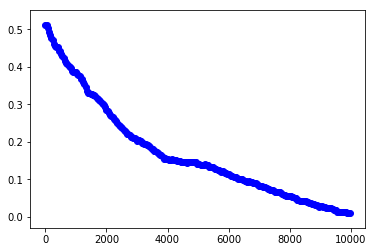

In [156]:
i = 40
errs_reduced = _errors[::i]
x = np.array(range(len(_errors)))[::i]
print(len(errs_reduced), len(x))
plt.scatter(x, errs_reduced, color = 'blue')
plt.show()

## Optimization ##

In [9]:
vector = np.random.choice(possibilities, n_col)
print(error(vector))

0.514


In [258]:
t_tresholds = np.linspace(0.33, 0.66, num=4)
t_increasing = np.linspace(1.1, 2, num=4)
betas = [1,2,3,4]
results = []
for treshold in t_tresholds:
    for increasing in t_increasing:
        for beta in betas:
            errors = np.zeros(n_iter)
            _dict = {'>0.5':0, '0.5-0.4':0, '0.4-0.3':0, '0.3-0.2':0, '0.2-0.1':0, '0.1-0.05':0, '0.05-0.01':0, '<0.01':0}
            repeat = 3
            for test in range(repeat):
                _error, loss_dict, B, threshold, rate = Glauber(vector, n_col, n_iter, beta, treshold, increasing)
                errors += _error
                for key in _dict.keys():
                    _dict[key] += loss_dict[key] 
            mean = errors / repeat
            for key in _dict.keys():
                _dict[key] = _dict[key]/repeat
            results.append((mean, _dict, beta, threshold, rate))
        
np.save('Glauber_sameRandom_result_4000', results)

Glauber with initial B: 1 , threshold : 0.33 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 416, '0.4-0.3': 565, '0.3-0.2': 693, '0.2-0.1': 915, '0.1-0.05': 826, '0.05-0.01': 1341, '<0.01': 5244}
Glauber with initial B: 1 , threshold : 0.33 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 348, '0.4-0.3': 569, '0.3-0.2': 688, '0.2-0.1': 1039, '0.1-0.05': 842, '0.05-0.01': 1654, '<0.01': 4860}
Glauber with initial B: 1 , threshold : 0.33 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 301, '0.4-0.3': 517, '0.3-0.2': 680, '0.2-0.1': 1002, '0.1-0.05': 813, '0.05-0.01': 1231, '<0.01': 5456}
Glauber with initial B: 2 , threshold : 0.33 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 372, '0.4-0.3': 520, '0.3-0.2': 626, '0.2-0.1': 965, '0.1-0.05': 526, '0.05-0.01': 1858, '<0.01': 5133}
Glauber with initial B: 2 , threshold : 0.33 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 364, '0.4-0.3': 517, '0.3-0.2': 793, '0.2-0.1': 812, '0.1-0.05': 1004, '0.05-0.01': 1377, '<0.01': 5133}
Glauber with initial B: 2 , threshold : 0.33 , rate: 1.1
{'>0.5': 0, '0.5-0.4

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


{'>0.5': 0, '0.5-0.4': 398, '0.4-0.3': 548, '0.3-0.2': 718, '0.2-0.1': 1092, '0.1-0.05': 813, '0.05-0.01': 1324, '<0.01': 5107}
Glauber with initial B: 1 , threshold : 0.33 , rate: 1.4000000000000001
{'>0.5': 0, '0.5-0.4': 415, '0.4-0.3': 440, '0.3-0.2': 863, '0.2-0.1': 1039, '0.1-0.05': 968, '0.05-0.01': 2166, '<0.01': 4109}
Glauber with initial B: 1 , threshold : 0.33 , rate: 1.4000000000000001
{'>0.5': 0, '0.5-0.4': 392, '0.4-0.3': 481, '0.3-0.2': 751, '0.2-0.1': 1224, '0.1-0.05': 703, '0.05-0.01': 1418, '<0.01': 5031}
Glauber with initial B: 2 , threshold : 0.33 , rate: 1.4000000000000001
{'>0.5': 0, '0.5-0.4': 349, '0.4-0.3': 469, '0.3-0.2': 757, '0.2-0.1': 945, '0.1-0.05': 694, '0.05-0.01': 2240, '<0.01': 4546}
Glauber with initial B: 2 , threshold : 0.33 , rate: 1.4000000000000001
{'>0.5': 0, '0.5-0.4': 376, '0.4-0.3': 588, '0.3-0.2': 705, '0.2-0.1': 1143, '0.1-0.05': 823, '0.05-0.01': 1288, '<0.01': 5077}
Glauber with initial B: 2 , threshold : 0.33 , rate: 1.4000000000000001
{

{'>0.5': 0, '0.5-0.4': 472, '0.4-0.3': 508, '0.3-0.2': 699, '0.2-0.1': 928, '0.1-0.05': 567, '0.05-0.01': 1435, '<0.01': 5391}
Glauber with initial B: 3 , threshold : 0.44 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 410, '0.4-0.3': 523, '0.3-0.2': 606, '0.2-0.1': 878, '0.1-0.05': 798, '0.05-0.01': 1562, '<0.01': 5223}
Glauber with initial B: 4 , threshold : 0.44 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 336, '0.4-0.3': 546, '0.3-0.2': 756, '0.2-0.1': 896, '0.1-0.05': 719, '0.05-0.01': 1232, '<0.01': 5515}
Glauber with initial B: 4 , threshold : 0.44 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 351, '0.4-0.3': 431, '0.3-0.2': 569, '0.2-0.1': 914, '0.1-0.05': 630, '0.05-0.01': 1737, '<0.01': 5368}
Glauber with initial B: 4 , threshold : 0.44 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 382, '0.4-0.3': 565, '0.3-0.2': 654, '0.2-0.1': 1001, '0.1-0.05': 773, '0.05-0.01': 1195, '<0.01': 5430}
Glauber with initial B: 1 , threshold : 0.44 , rate: 1.4000000000000001
{'>0.5': 0, '0.5-0.4': 382, '0.4-0.3': 572, '0.3-0.2': 726, '0.2

{'>0.5': 0, '0.5-0.4': 409, '0.4-0.3': 529, '0.3-0.2': 651, '0.2-0.1': 999, '0.1-0.05': 759, '0.05-0.01': 2435, '<0.01': 4218}
Glauber with initial B: 2 , threshold : 0.55 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 484, '0.4-0.3': 562, '0.3-0.2': 613, '0.2-0.1': 1006, '0.1-0.05': 768, '0.05-0.01': 1459, '<0.01': 5108}
Glauber with initial B: 2 , threshold : 0.55 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 412, '0.4-0.3': 675, '0.3-0.2': 798, '0.2-0.1': 934, '0.1-0.05': 756, '0.05-0.01': 1601, '<0.01': 4824}
Glauber with initial B: 2 , threshold : 0.55 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 313, '0.4-0.3': 476, '0.3-0.2': 484, '0.2-0.1': 909, '0.1-0.05': 828, '0.05-0.01': 1522, '<0.01': 5468}
Glauber with initial B: 3 , threshold : 0.55 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 336, '0.4-0.3': 475, '0.3-0.2': 690, '0.2-0.1': 959, '0.1-0.05': 648, '0.05-0.01': 1094, '<0.01': 5798}
Glauber with initial B: 3 , threshold : 0.55 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 347, '0.4-0.3': 515, '0.3-0.2': 639, '0.2-0.1': 904, '0.

{'>0.5': 0, '0.5-0.4': 304, '0.4-0.3': 522, '0.3-0.2': 731, '0.2-0.1': 957, '0.1-0.05': 835, '0.05-0.01': 1706, '<0.01': 4945}
Glauber with initial B: 4 , threshold : 0.55 , rate: 2.0
{'>0.5': 0, '0.5-0.4': 477, '0.4-0.3': 501, '0.3-0.2': 657, '0.2-0.1': 851, '0.1-0.05': 682, '0.05-0.01': 1379, '<0.01': 5453}
Glauber with initial B: 4 , threshold : 0.55 , rate: 2.0
{'>0.5': 0, '0.5-0.4': 352, '0.4-0.3': 542, '0.3-0.2': 638, '0.2-0.1': 778, '0.1-0.05': 793, '0.05-0.01': 1250, '<0.01': 5647}
Glauber with initial B: 1 , threshold : 0.66 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 282, '0.4-0.3': 544, '0.3-0.2': 696, '0.2-0.1': 758, '0.1-0.05': 692, '0.05-0.01': 1990, '<0.01': 5038}
Glauber with initial B: 1 , threshold : 0.66 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 414, '0.4-0.3': 430, '0.3-0.2': 604, '0.2-0.1': 837, '0.1-0.05': 662, '0.05-0.01': 1419, '<0.01': 5634}
Glauber with initial B: 1 , threshold : 0.66 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 361, '0.4-0.3': 575, '0.3-0.2': 775, '0.2-0.1': 1081, '0.

{'>0.5': 0, '0.5-0.4': 398, '0.4-0.3': 578, '0.3-0.2': 600, '0.2-0.1': 981, '0.1-0.05': 629, '0.05-0.01': 1555, '<0.01': 5259}
Glauber with initial B: 2 , threshold : 0.66 , rate: 2.0
{'>0.5': 0, '0.5-0.4': 411, '0.4-0.3': 509, '0.3-0.2': 607, '0.2-0.1': 1109, '0.1-0.05': 849, '0.05-0.01': 1907, '<0.01': 4608}
Glauber with initial B: 3 , threshold : 0.66 , rate: 2.0
{'>0.5': 0, '0.5-0.4': 426, '0.4-0.3': 490, '0.3-0.2': 657, '0.2-0.1': 826, '0.1-0.05': 754, '0.05-0.01': 1717, '<0.01': 5130}
Glauber with initial B: 3 , threshold : 0.66 , rate: 2.0
{'>0.5': 0, '0.5-0.4': 392, '0.4-0.3': 614, '0.3-0.2': 647, '0.2-0.1': 1040, '0.1-0.05': 987, '0.05-0.01': 1439, '<0.01': 4881}
Glauber with initial B: 3 , threshold : 0.66 , rate: 2.0
{'>0.5': 0, '0.5-0.4': 341, '0.4-0.3': 512, '0.3-0.2': 599, '0.2-0.1': 1322, '0.1-0.05': 976, '0.05-0.01': 2133, '<0.01': 4117}
Glauber with initial B: 4 , threshold : 0.66 , rate: 2.0
{'>0.5': 0, '0.5-0.4': 382, '0.4-0.3': 575, '0.3-0.2': 657, '0.2-0.1': 977, '

Glauber with initial B: 2 , threshold : 0.43333333333333335 , rate: 1.4000000000000001

In [10]:
def get_best_params(file):
    results = np.load(file)
    max_count = 0
    best_params = None

    for res in results:
        loss_dict = res[1]
        if loss_dict['<0.01'] > max_count:
            max_count = loss_dict['<0.01']
            best_params = res
    
    return best_params
        
best_params_glauber = get_best_params('Glauber_sameRandom_result_4000.npy')
best_params_metro = get_best_params('Metro_results.npy')
print('Best results Metropolis:')
print(best_params_metro)
print('Best results Glauber:')
print(best_params_glauber)

Best results Metropolis:
[array([0.494 , 0.4935, 0.4935, ..., 0.0055, 0.0055, 0.0055])
 {'>0.5': 5.5, '0.5-0.4': 458.5, '0.4-0.3': 763.5, '0.3-0.2': 1402.5, '0.2-0.1': 2640.0, '0.1-0.05': 1659.5, '0.05-0.01': 1769.0, '<0.01': 1301.5}
 2 0.25 2.0]
Best results Glauber:
[array([0.487     , 0.48633333, 0.486     , ..., 0.        , 0.        ,
       0.        ])
 {'>0.5': 0.0, '0.5-0.4': 356.3333333333333, '0.4-0.3': 514.0, '0.3-0.2': 659.6666666666666, '0.2-0.1': 937.0, '0.1-0.05': 707.3333333333334, '0.05-0.01': 1388.0, '<0.01': 5437.666666666667}
 4 0.44 1.1]


In [261]:
for i in range(6):
    base_errs_glauber,_,_,_,_ = Glauber(vector, n_col, 10000, 4.0, 0.44, 1.1)

Glauber with initial B: 4.0 , threshold : 0.44 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 285, '0.4-0.3': 522, '0.3-0.2': 695, '0.2-0.1': 1058, '0.1-0.05': 777, '0.05-0.01': 2470, '<0.01': 4193}
Glauber with initial B: 4.0 , threshold : 0.44 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 356, '0.4-0.3': 492, '0.3-0.2': 581, '0.2-0.1': 985, '0.1-0.05': 523, '0.05-0.01': 1428, '<0.01': 5635}
Glauber with initial B: 4.0 , threshold : 0.44 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 434, '0.4-0.3': 472, '0.3-0.2': 616, '0.2-0.1': 1007, '0.1-0.05': 796, '0.05-0.01': 1497, '<0.01': 5178}
Glauber with initial B: 4.0 , threshold : 0.44 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 404, '0.4-0.3': 450, '0.3-0.2': 529, '0.2-0.1': 811, '0.1-0.05': 864, '0.05-0.01': 1727, '<0.01': 5215}
Glauber with initial B: 4.0 , threshold : 0.44 , rate: 1.1
{'>0.5': 0, '0.5-0.4': 348, '0.4-0.3': 493, '0.3-0.2': 668, '0.2-0.1': 922, '0.1-0.05': 670, '0.05-0.01': 1872, '<0.01': 5027}
Glauber with initial B: 4.0 , threshold : 0.44 , rate: 1.1
{'>0.5': 

Glauber with initial B: 4 , threshold : 1.0 , rate: 1.0
{'>0.5': 57, '0.5-0.4': 407, '0.4-0.3': 509, '0.3-0.2': 705, '0.2-0.1': 1084, '0.1-0.05': 684, '0.05-0.01': 1677, '<0.01': 4877}
Metropolis with initial B: 2 , threshold : 1.0 , rate: 1.0
{'>0.5': 0, '0.5-0.4': 403, '0.4-0.3': 530, '0.3-0.2': 692, '0.2-0.1': 1063, '0.1-0.05': 606, '0.05-0.01': 1365, '<0.01': 5341}
Glauber with initial B: 4 , threshold : 1.0 , rate: 1.0
{'>0.5': 66, '0.5-0.4': 322, '0.4-0.3': 467, '0.3-0.2': 739, '0.2-0.1': 872, '0.1-0.05': 715, '0.05-0.01': 1819, '<0.01': 5000}
Metropolis with initial B: 2 , threshold : 1.0 , rate: 1.0
{'>0.5': 0, '0.5-0.4': 436, '0.4-0.3': 500, '0.3-0.2': 768, '0.2-0.1': 938, '0.1-0.05': 714, '0.05-0.01': 1812, '<0.01': 4832}
Glauber with initial B: 4 , threshold : 1.0 , rate: 1.0
{'>0.5': 49, '0.5-0.4': 403, '0.4-0.3': 551, '0.3-0.2': 762, '0.2-0.1': 813, '0.1-0.05': 659, '0.05-0.01': 1791, '<0.01': 4972}
Metropolis with initial B: 2 , threshold : 1.0 , rate: 1.0
{'>0.5': 0, '0.

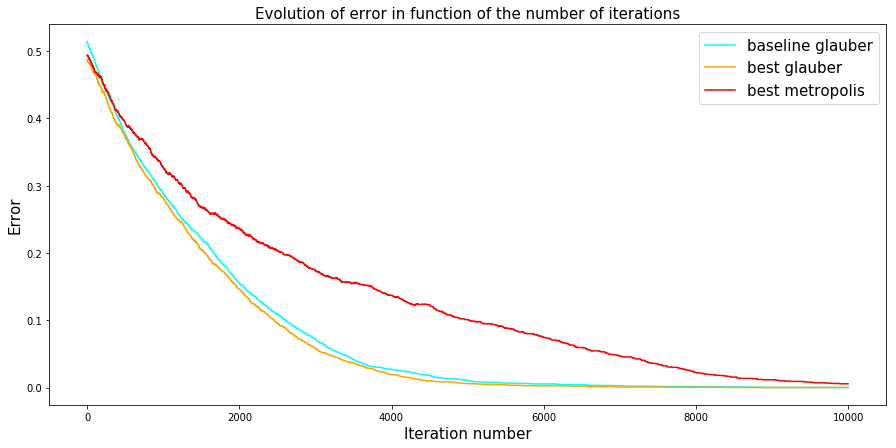

In [12]:
best_errs_glauber = best_params_glauber[0]
best_beta_glauber, best_thresh_glauber, best_rate_glauber = best_params_glauber[2], best_params_glauber[3], best_params_glauber[4]

best_errs_metro = best_params_metro[0]
best_beta_metro, best_thresh_metro, best_rate_metro = best_params_metro[2], best_params_metro[3], best_params_metro[4]

"""baseline_errs_glauber = np.zeros(n_iter)
baseline_errs_metro = np.zeros(n_iter)
for i in range(4):
    base_errs_glauber,_,_,_,_ = Glauber(vector, n_col, n_iter, best_beta_glauber, 1.0, 1.0)
    baseline_errs_glauber += np.array(base_errs_glauber)
    
    base_errs_metro,_,_,_,_ = Metropolis_chain(n_col, n_iter, best_beta_metro, 1.0, 1.0)
    baseline_errs_metro += np.array(base_errs_metro)
baseline_errs_glauber = baseline_errs_glauber / 4.0
baseline_errs_metro = baseline_errs_metro / 4.0"""

x = np.array(range(len(best_errs_glauber)))

plt.figure(figsize=(15,7))
plt.title("Evolution of error in function of the number of iterations", size = 15)
plt.plot(x, baseline_errs_glauber, color = 'cyan', label = 'baseline glauber')
#plt.plot(x, baseline_errs_metro, color = 'blue', label = 'baseline metropolis')
plt.plot(x, best_errs_glauber, color = 'orange', label = 'best glauber')
plt.plot(x, best_errs_metro, color = 'red', label = 'best metropolis')


plt.xlabel('Iteration number', size = 15)
plt.ylabel('Error', size = 15)
plt.legend(prop={'size': 15})
plt.show()

## Results ##  

In [34]:
Metropolis_chain(n_col, 15000, 2, 0.6, 1.5)

Metropolis with initial B: 2 , threshold : 0.6 , rate: 1.5


KeyboardInterrupt: 

In [32]:
errs, loss_dict = Glauber(n_col, 1000, 2, 0.6, 1.5)

Glauber with initial B: 2 , threshold : 0.6 , rate: 1.5
{'>0.5': 0, '0.5-0.4': 599, '0.4-0.3': 401, '0.3-0.2': 0, '0.2-0.1': 0, '0.1-0.05': 0, '0.05-0.01': 0, '<0.01': 0}


In [138]:
values = []
B_values = np.linspace(1, 10, num = 5)
for b in B_values:
    for i in range(3):
        values.append((b,Glauber(n_col, 50, b, 0.75, 1.75)))

0.496
proba :  0.9845489830287478
proba :  0.8422831403135678
proba :  0.9999889196373277
proba :  0.994215504899786
proba :  0.00038431592612742094
proba :  0.9883352936708885
proba :  0.8753694779332746
proba :  0.9735996411961392
proba :  0.0026808444732746017
proba :  0.46471755638484885
0.494
proba :  0.964639014329487
proba :  0.00033072058389144177
proba :  0.9821934076781726
proba :  0.9955446172283464
proba :  0.9999999995792042
proba :  0.001799992561690944
proba :  0.9999999342712989
proba :  0.9999999028801558
proba :  3.13499034398923e-07


KeyboardInterrupt: 

In [11]:
t_tresholds

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [ ]:
errors = []
for i in range(N):
    error = #Glauber ou Metropolis_chain selon best_set_up
    errors.append(error)
mean = np.mean(errors)
variance = np.var(errors)
print('Mean error : ', mean)
print('Variance of error : ' variance)

In [86]:
best_set_up

('Metropolis', 'treshold :', 0.5, 'rate :', 5.0, 'error :', 0.015)

In [82]:
t_increasing = np.linspace(1.5, 5, num=8)
t_increasing

array([1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
BEST_SO_FAR = 0.01411756195508118 #Metropolis_chain(n_col, 100, B) 0.8